### Project Proposal Code
### Jackson Ward
### 4/3/25

In [71]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# Setup headless browser
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # run without opening browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Go directly to your final BEA GDP data page
url = "https://apps.bea.gov/iTable/?reqid=70&step=1#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNiwyNywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCI2MDAiXSxbIk1ham9yX0FyZWEiLCIwIl0sWyJTdGF0ZSIsWyIwIl1dLFsiQXJlYSIsWyIxOTAwMCJdXSxbIlN0YXRpc3RpYyIsWyIxIl1dLFsiVW5pdF9vZl9tZWFzdXJlIiwiTGV2ZWxzIl0sWyJZZWFyIixbIi0xIl1dLFsiWWVhckJlZ2luIiwiLTEiXSxbIlllYXJfRW5kIiwiLTEiXV19"
driver.get(url)

# Wait for the GDP data cells to appear
try:
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "td.NormalStyle.p0"))
    )
except:
    print("Timeout: GDP table did not load.")
    driver.quit()
    raise

# Scrape GDP values
gdp_elements = driver.find_elements(By.CSS_SELECTOR, "td.NormalStyle.p0")

# Parse and clean
gdp_values = []
for el in gdp_elements:
    text = el.text.strip().replace(",", "")
    try:
        gdp_values.append(float(text))
    except ValueError:
        continue  # Skip if it's not a number

driver.quit()

# Create year column (assuming it's 1997 onward — BEA GDP series usually starts there)
start_year = 1997
years = list(range(start_year, start_year + len(gdp_values)))

# Build DataFrame
gdp_df = pd.DataFrame({
    "Year": years,
    "Iowa_GDP": gdp_values
})

print(gdp_df)

    Year  Iowa_GDP
0   1997  129323.4
1   1998  128077.5
2   1999  131035.2
3   2000  137476.9
4   2001  149063.2
5   2002  153626.8
6   2003  155704.5
7   2004  162838.1
8   2005  160469.1
9   2006  156737.2
10  2007  161593.1
11  2008  164559.3
12  2009  170923.7
13  2010  171069.1
14  2011  180309.9
15  2012  185989.2
16  2013  186729.9
17  2014  187125.0
18  2015  189245.1
19  2016  188471.4
20  2017  186328.2
21  2018  201147.1
22  2019  201580.4
23  2020  202051.4
24  2021  201096.8


In [73]:
economic_df = pd.read_csv('Iowa_Economic_Indicators.csv')

# Check the first few rows of the CSV
print(economic_df)

        Month  Iowa Leading Indicator Index  Avg Weekly Manufacturing Hours  \
0    Jan 1999                         99.77                           41.83   
1    Feb 1999                         99.59                           41.68   
2    Mar 1999                         99.88                           41.58   
3    Apr 1999                        100.05                           41.60   
4    May 1999                        100.02                           41.53   
5    Jun 1999                        100.13                           41.50   
6    Jul 1999                         99.88                           41.44   
7    Aug 1999                         99.91                           41.37   
8    Sep 1999                        100.03                           41.39   
9    Oct 1999                        100.12                           41.40   
10   Nov 1999                        100.32                           41.40   
11   Dec 1999                        100.29         

In [75]:
# Step 1: Extract the year from the 'Month' column in the monthly data
economic_df['Year'] = pd.to_datetime(economic_df['Month'], format='%b %Y').dt.year

# Step 2: Merge the monthly data with the GDP data based on the 'Year' column
df_combined = pd.merge(economic_df, gdp_df[['Year', 'Iowa_GDP']], on='Year', how='left')

In [57]:
df_combined

,Month,Iowa Leading Indicator Index,Avg Weekly Manufacturing Hours,Residential Building Permits,New Orders Index,Avg Weekly Unemployment Claims,Yield Spread,Diesel Fuel Consumption (Gallons),Iowa Stock Market Index,Agricultural Futures Profits Index,Non-Farm Employment Coincident Index,Corn Profits,Soybean Profits,Cattle Profits,Hog Profits,1 Month Diffusion Index,6 Month Diffusion Index,Year,Iowa_GDP
0,Jan 1999,99.77,41.83,1136,52.4,2768,0.27,44828906.00,39.20,3.24,99.11,61.43,201.83,6.69,25.50,NaN,NaN,1999,202051.4
1,Feb 1999,99.59,41.68,1123,51.0,2765,0.44,44737672.83,37.65,2.92,99.28,57.40,185.72,15.01,26.32,50.00,NaN,1999,202051.4
2,Mar 1999,99.88,41.58,1146,51.1,2768,0.66,45145275.50,38.87,0.38,99.47,53.96,170.82,20.25,25.21,75.00,NaN,1999,202051.4
3,Apr 1999,100.05,41.60,1158,50.7,2806,0.77,45302449.83,41.06,-0.53,99.67,51.02,158.15,20.44,25.43,56.25,NaN,1999,202051.4
4,May 1999,100.02,41.53,1131,51.5,2894,0.91,45501298.75,42.34,-2.00,99.83,48.39,143.74,18.56,24.93,50.00,NaN,1999,202051.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Aug 2024,104.80,40.33,917,49.0,2500,-1.43,64236941.83,129.08,0.63,110.01,-10.97,-56.00,16.94,28.53,37.50,37.50,2024,NaN
308,Sep 2024,105.41,40.47,946,48.4,2535,-1.20,65405104.25,133.77,-0.27,110.08,-15.45,-70.30,16.54,29.58,62.50,50.00,2024,NaN
309,Oct 2024,105.80,40.55,971,48.9,2549,-0.62,65042278.17,141.57,-0.06,110.09,-20.10,-82.31,16.73,30.56,62.50,68.75,2024,NaN
310,Nov 2024,106.30,40.62,1015,48.8,2561,-0.26,65118376.08,154.12,0.12,110.11,-22.40,-94.30,15.68,31.97,75.00,75.00,2024,NaN


# Question 1: What is the relationship between the Iowa Leading Indicator Index and Iowa’s GDP growth?

In [93]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [95]:
df_pearson = df_combined.dropna(subset=['Iowa Leading Indicator Index','Iowa_GDP'])

corr_coef, p_value = pearsonr(df_pearson['Iowa Leading Indicator Index'], df_pearson['Iowa_GDP'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4g}")

Pearson Correlation Coefficient: 0.7132
P-value: 3.506e-44


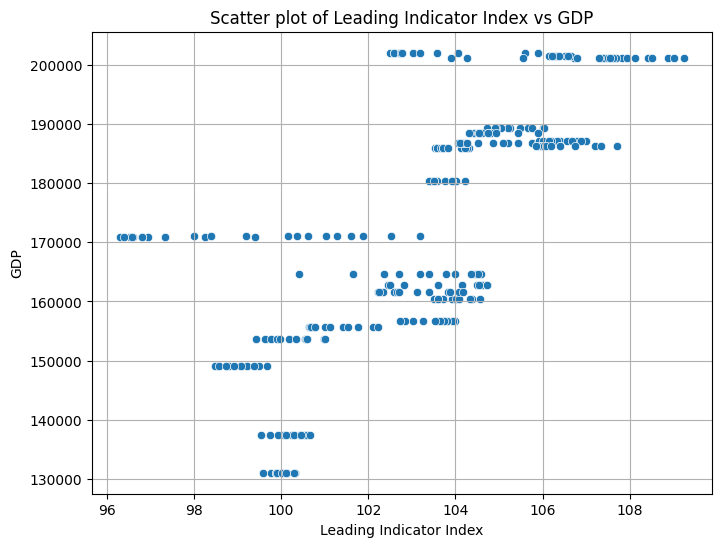

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Iowa Leading Indicator Index', y='Iowa_GDP', data=df_pearson)
plt.title('Scatter plot of Leading Indicator Index vs GDP')
plt.xlabel('Leading Indicator Index')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

Yearly Pearson Correlation Coefficient: 0.7395
Yearly P-value: 5.53e-05


/var/folders/f4/1z7x09bd16gdrqpbmbvn_48h0000gn/T/ipykernel_62036/1780636970.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_combined['Year'] = pd.to_datetime(df_combined['Month']).dt.year


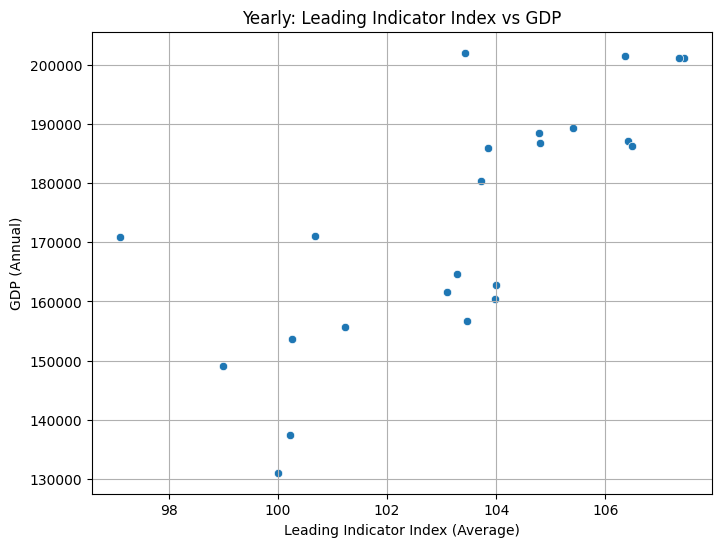

In [99]:
df_combined['Year'] = pd.to_datetime(df_combined['Month']).dt.year

yearly_df = df_combined.groupby('Year').agg({
    'Iowa Leading Indicator Index': 'mean',
    'Iowa_GDP': 'mean'
}).reset_index()

# Now re-run the correlation and plot
from scipy.stats import pearsonr

yearly_df_clean = yearly_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Iowa Leading Indicator Index', 'Iowa_GDP'])


corr_coef, p_value = pearsonr(yearly_df_clean['Iowa Leading Indicator Index'], yearly_df_clean['Iowa_GDP'])
print(f"Yearly Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"Yearly P-value: {p_value:.4g}")

# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='Iowa Leading Indicator Index', y='Iowa_GDP', data=yearly_df)
plt.title('Yearly: Leading Indicator Index vs GDP')
plt.xlabel('Leading Indicator Index (Average)')
plt.ylabel('GDP (Annual)')
plt.grid(True)
plt.show()

# Machine Learning attempt

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [113]:
#binary target — 1 if GDP > median, else 0
median_gdp = yearly_df_clean['Iowa_GDP'].mean()
yearly_df_clean['GDP_High'] = (yearly_df_clean['Iowa_GDP'] > median_gdp).astype(int)

# Features (X) and Target (y)
X = yearly_df_clean[['Iowa Leading Indicator Index']]  # Features
y = yearly_df_clean['GDP_High']  

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [119]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[3 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

